# Neural Networks and Embeddings for Natural Language Processing

Outline:
- Download the Data
- Prepare Data for Training
- Logistic Regression Model
- Feed Forward Nueral Network


Dataset: https://www.kaggle.com/c/quora-insincere-questions-classification

## Download the Data

Upload your `kaggle.json` file to Colab

In [7]:
import os

In [8]:
os.environ['KAGGLE_CONFIG_DIR'] = '/content'

In [9]:
!kaggle competitions download -c quora-insincere-questions-classification -f train.csv
!kaggle competitions download -c quora-insincere-questions-classification -f test.csv
!kaggle competitions download -c quora-insincere-questions-classification -f sample_submission.csv

train.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
test.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
sample_submission.csv.zip: Skipping, found more recently modified local copy (use --force to force download)


In [10]:
train_fname = './train.csv.zip'
test_fname = './test.csv.zip'
sub_fname = './sample_submission.csv.zip'

In [11]:
import pandas as pd

In [12]:
raw_df = pd.read_csv(train_fname)
test_df = pd.read_csv(test_fname)
sub_df = pd.read_csv(sub_fname)

In [13]:
raw_df.head()

,qid,question_text,target
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0


In [14]:
SAMPLE_SIZE = 100_000
sample_df = raw_df.sample(100_000)

In [15]:
sample_df.head()

,qid,question_text,target
1236151,f240229fdad0c6441324,"What is your story of journey through MBBS, PG...",0
999820,c3ef29b99af1d837f816,What do you make of the idea that Obama was pr...,1
540929,69fc0165b0404a7f9e26,Is S.H.I.E.L.D. part of the CIA?,0
381527,4ac70384b5634ab36e9b,Is their anyone currently living in Syria usin...,0
802445,9d3bc350a96af7ce6817,What was Friedrich Mohs known for?,0


In [16]:
sample_df.target.value_counts()

0    93865
1     6135
Name: target, dtype: int64

## Prepare Data for Training


Outline:
- Convert text to TF-IDF Vectors
- Split training & validation set
- Convert to PyTorch tensors

### Conversion to TF-IDF Vectors

In [17]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [18]:
from nltk.stem import SnowballStemmer

In [19]:
stemmer = SnowballStemmer(language = 'english')

In [20]:
def tokenize(text):
  return [stemmer.stem(token) for token in word_tokenize(text)]

In [21]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [22]:
eng_stop = stopwords.words('english')

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [24]:
vectorizer = TfidfVectorizer(tokenizer = tokenize, stop_words = eng_stop, max_features = 1000)

In [25]:
vectorizer.fit(sample_df.question_text)

/usr/local/lib/python3.8/dist-packages/sklearn/feature_extraction/text.py:516: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/feature_extraction/text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'s", 'abov', 'ani', 'becaus', 'befor', 'could', 'doe', 'dure', 'might', 'must', "n't", 'need', 'onc', 'onli', 'ourselv', 'sha', 'themselv', 'veri', 'whi', 'wo', 'would', 'yourselv'] not in stop_words.
  warnings.warn(


TfidfVectorizer(max_features=1000,
                stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...],
                tokenizer=<function tokenize at 0x7fddac948ca0>)

In [26]:
inputs = vectorizer.transform(sample_df.question_text)

In [27]:
test_inputs = vectorizer.transform(test_df.question_text)

In [28]:
inputs.shape

(100000, 1000)

In [29]:
test_inputs.shape

(375806, 1000)

### Split training and validation set

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
train_inputs, val_inputs, train_targets, val_targets = train_test_split(inputs, sample_df.target, test_size = 0.3)

In [32]:
train_inputs.shape

(70000, 1000)

### Convert to PyTorch Tensors

In [33]:
import torch

In [34]:
train_input_tensor = torch.tensor(train_inputs.toarray()).float()
val_input_tensor = torch.tensor(val_inputs.toarray()).float()

In [35]:
train_input_tensor

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [36]:
train_target_tensor = torch.tensor(train_targets.values)
val_target_tensor = torch.tensor(val_targets.values)

In [37]:
test_input_tensor = torch.tensor(test_inputs.toarray()).float()

## Create PyTorch Data Loader

In [38]:
from torch.utils.data import TensorDataset, DataLoader

In [39]:
train_ds = TensorDataset(train_input_tensor, train_target_tensor)
val_ds = TensorDataset(val_input_tensor, val_target_tensor)
test_ds = TensorDataset(test_input_tensor)

In [40]:
train_ds[:10]

(tensor([[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]),
 tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]))

In [41]:
BATCH_SIZE = 128

In [42]:
train_dl = DataLoader(train_ds, batch_size = BATCH_SIZE, shuffle = True)
val_dl = DataLoader(val_ds, batch_size = BATCH_SIZE)
test_dl = DataLoader(test_ds, batch_size = BATCH_SIZE)

## Logistic Regression Model

In [43]:
import torch.nn as nn
import torch.nn.functional as F

In [46]:
class QuoraNet(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer1 = nn.Linear(1000, 512)
    self.layer2 = nn.Linear(512, 256)
    self.layer3 = nn.Linear(256, 128)
    self.layer4 = nn.Linear(128, 1)
  
  def forward(self, inputs):
    out = self.layer1(inputs)
    out = F.relu(out)
    out = self.layer2(out)
    out = F.relu(out)
    out = self.layer3(out)
    out = F.relu(out)
    out = self.layer4(out)
    return out

In [47]:
model = QuoraNet()

In [57]:
from sklearn.metrics import accuracy_score, f1_score

In [63]:
for batch in train_dl:
  bi, bt = batch
  print(bi.shape)
  print(bt.shape)

  bo = model(bi)
  print(bo.shape)


  #Convert outputs to probablities
  probs = torch.sigmoid(bo[:,0])
  print(probs[:10])

  #Convert probs to predictions
  preds = (probs > 0.5).int()
  print(preds[:10])

  #Check Accuracy
  print('accuracy', accuracy_score(bt, preds))
  print('f1 score', f1_score(bt, preds))

  #Check Loss
  print('Loss', F.binary_cross_entropy(preds.float(), bt.float()))
  break

torch.Size([128, 1000])
torch.Size([128])
torch.Size([128, 1])
tensor([0.4993, 0.4992, 0.4990, 0.4993, 0.4990, 0.4992, 0.4990, 0.4989, 0.4991,
        0.4989], grad_fn=<SliceBackward0>)
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=torch.int32)
accuracy 0.96875
f1 score 0.0
Loss tensor(3.1250)


In [87]:
def evaluate(model, dl):
  losses, accuracies, f1s = [], [], []
  #Loop over batches
  for batch in dl:
    inputs, targets = batch

    #pass inputs to model
    output = model(inputs)

    #Convert to probabilites
    probs = torch.sigmoid(output[:,0])

    #Compute loss
    loss = F.binary_cross_entropy(probs.float(), targets.float(), weight = torch.tensor(20))

    #compute preds
    preds = (probs > 0.5).int()

    #accuracy and f1
    accuracy = accuracy_score(targets, preds)
    f1 = f1_score(targets, preds)

    losses.append(loss)
    accuracies.append(accuracy)
    f1s.append(f1)

  return torch.mean(torch.tensor(losses)), torch.mean(torch.tensor(accuracies)), torch.mean(torch.tensor(f1s))

In [88]:
evaluate(model, train_dl)

(tensor(0.3144),
 tensor(0.9950, dtype=torch.float64),
 tensor(0.9555, dtype=torch.float64))

In [89]:
evaluate(model, val_dl)

(tensor(8.3426),
 tensor(0.9288, dtype=torch.float64),
 tensor(0.3821, dtype=torch.float64))

In [94]:
def fit(epochs, learning_rate, model, train_dl, val_dl):
  history = []
  optimizer = torch.optim.Adam(model.parameters(), learning_rate, weight_decay=1e-5)

  for epoch in range(epochs):
    #Training Phase
    for batch in train_dl:
      inputs, targets = batch
      outputs = model(inputs)
      probs = torch.sigmoid(outputs[:,0])
      loss = F.binary_cross_entropy(probs.float(), targets.float(), weight = torch.tensor(20))


      #perform optimisation
      loss.backward()
      optimizer.step()
      optimizer.zero_grad()
    
    #Evaluation Phase
    loss, acc, f1 = evaluate(model, val_dl)
    print(epoch + 1, loss, acc, f1)
    history.append([loss, acc, f1])
  return history

In [101]:
history = fit(5, 0.001, model, train_dl, val_dl)

1 tensor(5.6834) tensor(0.9351, dtype=torch.float64) tensor(0.3495, dtype=torch.float64)
2 tensor(7.2972) tensor(0.9357, dtype=torch.float64) tensor(0.3496, dtype=torch.float64)
3 tensor(8.4468) tensor(0.9369, dtype=torch.float64) tensor(0.3275, dtype=torch.float64)
4 tensor(8.8963) tensor(0.9357, dtype=torch.float64) tensor(0.3569, dtype=torch.float64)
5 tensor(9.9229) tensor(0.9335, dtype=torch.float64) tensor(0.3493, dtype=torch.float64)


In [108]:
l, a, f = [float(item[0]) for item in history], [float(item[1]) for item in history], [float(item[2]) for item in history]

In [111]:
import matplotlib.pyplot as plt

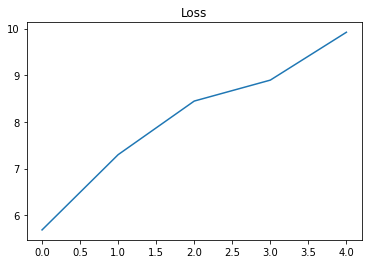

In [112]:
plt.title('Loss')
plt.plot(l)

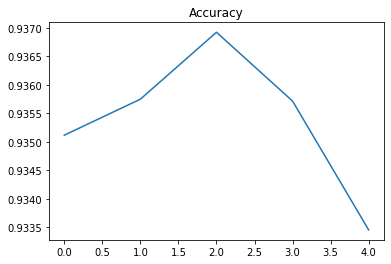

In [113]:
plt.title('Accuracy')
plt.plot(a)

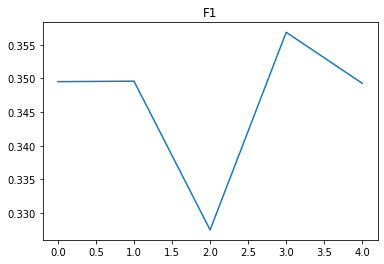

In [114]:
plt.title('F1')
plt.plot(f)

## Feed Forward Neural Network

## Make Predictions and Submit

In [115]:
test_inputs

<375806x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 2056580 stored elements in Compressed Sparse Row format>

In [119]:
def make_preds(dl):
  all = []
  for batch in dl:
    inputs = batch[0]
    outputs = model(inputs)
    probs = torch.sigmoid(outputs[:,0])
    preds = (probs > 0.5).int()
    all += list(preds.detach().numpy())
  return all


In [120]:
test_preds = make_preds(test_dl)

In [124]:
len(test_preds)

375806

In [125]:
sub_df

,qid,prediction
0,0000163e3ea7c7a74cd7,0
1,00002bd4fb5d505b9161,0
2,00007756b4a147d2b0b3,0
3,000086e4b7e1c7146103,0
4,0000c4c3fbe8785a3090,0
...,...,...
375801,ffff7fa746bd6d6197a9,0
375802,ffffa1be31c43046ab6b,0
375803,ffffae173b6ca6bfa563,0
375804,ffffb1f7f1a008620287,0


In [127]:
sub_df.prediction = test_preds

In [129]:
sub_df.head()

,qid,prediction
0,0000163e3ea7c7a74cd7,0
1,00002bd4fb5d505b9161,0
2,00007756b4a147d2b0b3,0
3,000086e4b7e1c7146103,0
4,0000c4c3fbe8785a3090,0


In [130]:
sub_df.to_csv('sub.csv', index = None)